In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [673]:
train = pd.read_csv("C:/Users/Agriya/Desktop/Data Science/My Practice and Learning/Jupyter Notebook/Decision Tree/Kaggle/train.csv")

In [674]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [675]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [676]:
train.shape

(891, 12)

In [677]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

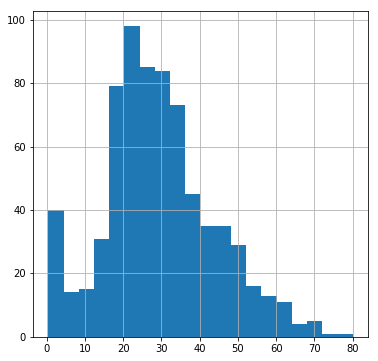

In [678]:
train["Age"].hist(bins = "auto", figsize = (6,6))

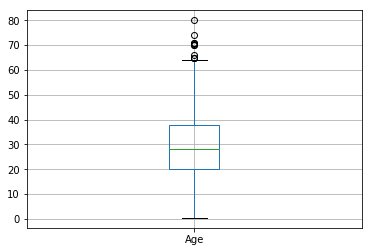

In [679]:
train.boxplot(column = "Age")

In [680]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


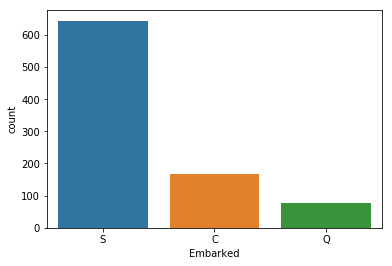

In [681]:
sns.countplot(x = "Embarked", data = train)

In [682]:
from sklearn.preprocessing import Imputer

# axis: 
    # 0 - which signifies rows(Default)
    # 1 - which signifies columns

Imputer = Imputer(missing_values='NaN', strategy='mean', axis = 0)

train["Age"]  = Imputer.fit_transform(train["Age"].values.reshape(-1, 1))

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [683]:
train["Embarked"] = train["Embarked"].fillna("S")

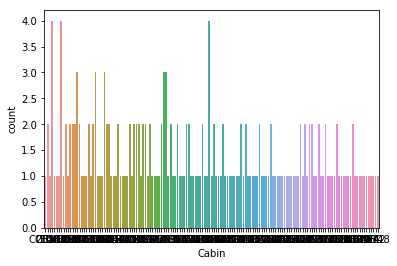

In [684]:
sns.countplot(x = "Cabin", data = train)

In [685]:
train["Cabin"] = np.where(train['Cabin'].isna(),0,1)

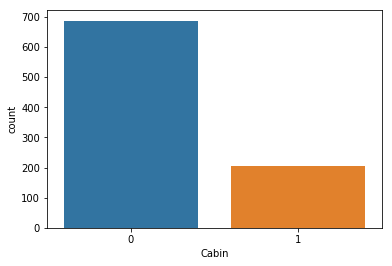

In [686]:
sns.countplot(x = "Cabin", data = train)

In [687]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [688]:
train["Family_Count"] = train["SibSp"] + train["Parch"] + 1

In [689]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,1,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C,2


In [690]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Count'],
      dtype='object')

In [691]:
train_data = train[["Pclass", "Sex", "Age", "Fare","Cabin","Embarked","Family_Count","Survived"]]

In [692]:
train_data.head(3)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Count,Survived
0,3,male,22.0,7.2500,0,S,2,0
1,1,female,38.0,71.2833,1,C,2,1
2,3,female,26.0,7.9250,0,S,1,1


In [693]:
from sklearn.preprocessing import LabelEncoder

input = LabelEncoder()

train_data["Sex"] = input.fit_transform(train_data["Sex"])
train_data["Embarked"] = input.fit_transform(train_data["Embarked"])

C:\Users\Agriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Agriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [694]:
train_data.head(3)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Count,Survived
0,3,1,22.0,7.2500,0,2,2,0
1,1,0,38.0,71.2833,1,0,2,1
2,3,0,26.0,7.9250,0,2,1,1


In [538]:
train_data.shape

(891, 8)

In [695]:
Correlation = train_data.corr()
Correlation

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Count,Survived
Pclass,1.000000,0.131900,-0.331339,-0.549500,-0.725541,0.162098,0.065997,-0.338481
Sex,0.131900,1.000000,0.084153,-0.182333,-0.140391,0.108262,-0.200988,-0.543351
Age,-0.331339,0.084153,1.000000,0.091566,0.233123,-0.026749,-0.248512,-0.069809
Fare,-0.549500,-0.182333,0.091566,1.000000,0.482075,-0.224719,0.217138,0.257307
Cabin,-0.725541,-0.140391,0.233123,0.482075,1.000000,-0.160196,-0.009175,0.316912
Embarked,0.162098,0.108262,-0.026749,-0.224719,-0.160196,1.000000,0.066516,-0.167675
Family_Count,0.065997,-0.200988,-0.248512,0.217138,-0.009175,0.066516,1.000000,0.016639
Survived,-0.338481,-0.543351,-0.069809,0.257307,0.316912,-0.167675,0.016639,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

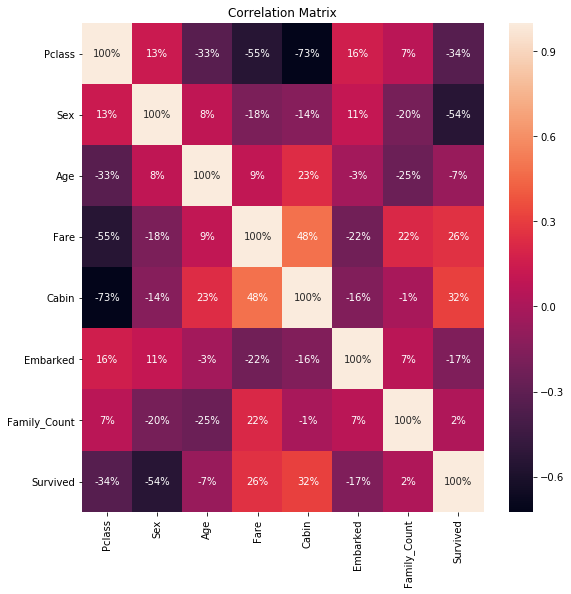

In [696]:
plt.figure(figsize = (9,9))
sns.heatmap(Correlation, annot = True, fmt = ".0%")
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title("Correlation Matrix")

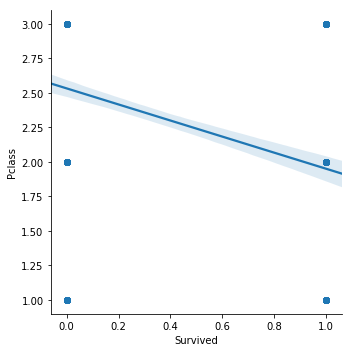

In [697]:
sns.lmplot(x = "Survived", y = "Pclass", data = train_data)

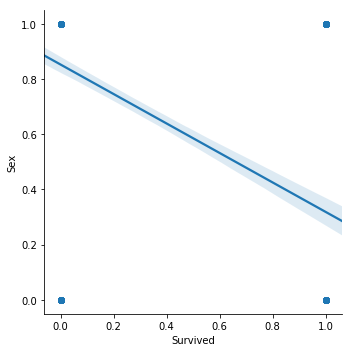

In [698]:
sns.lmplot(x = "Survived", y = "Sex", data = train_data)

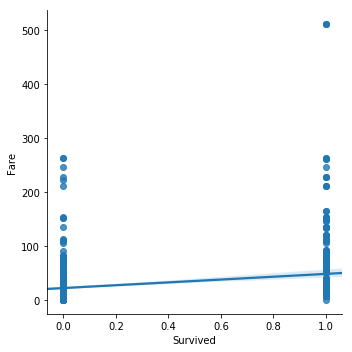

In [699]:
sns.lmplot(x = "Survived", y = "Fare", data = train_data)

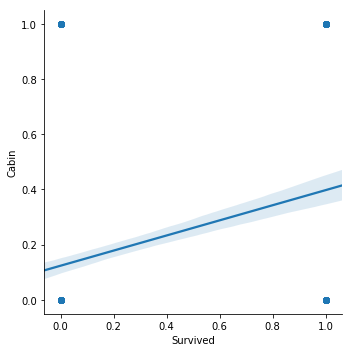

In [700]:
sns.lmplot(x = "Survived", y = "Cabin", data = train_data)

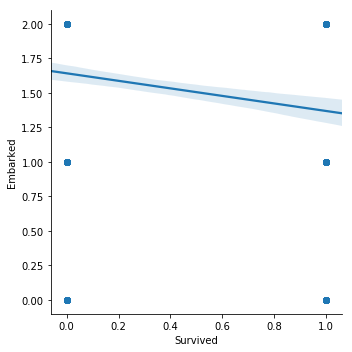

In [701]:
sns.lmplot(x = "Survived", y = "Embarked", data = train_data)

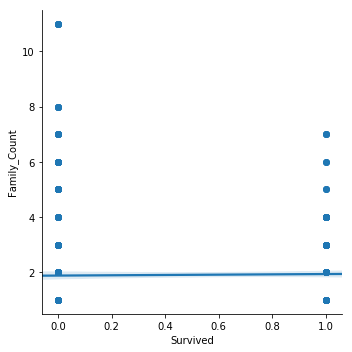

In [702]:
sns.lmplot(x = "Survived", y = "Family_Count", data = train_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAF27D4CF8>,
      dtype=object)

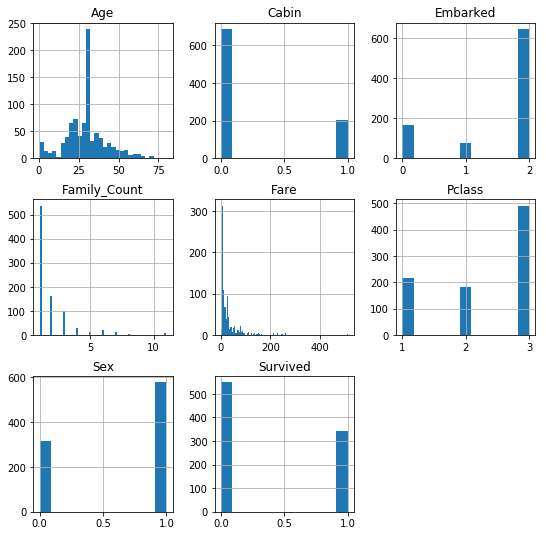

In [703]:
train_data.hist(bins = "auto", figsize = (9,9))

In [704]:
X = train_data.iloc[:,0:7]
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Count
0,3,1,22.0,7.2500,0,2,2
1,1,0,38.0,71.2833,1,0,2
2,3,0,26.0,7.9250,0,2,1
3,1,0,35.0,53.1000,1,2,2
4,3,1,35.0,8.0500,0,2,1


In [705]:
Y = train_data.iloc[:,7]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [706]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

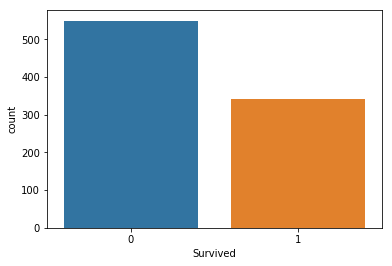

In [707]:
sns.countplot(x = "Survived", data = train_data)

In [552]:
test = pd.read_csv("C:/Users/Agriya/Desktop/Data Science/My Practice and Learning/Kaggle_Solutions/Dataset/Titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [708]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null int64
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            418 non-null float64
Cabin           418 non-null int32
Embarked        418 non-null int32
Family_Count    418 non-null int64
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 36.0+ KB


In [709]:
test.shape

(418, 12)

In [710]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Family_Count    0
dtype: int64

In [711]:
from sklearn.preprocessing import Imputer

# axis: 
    # 0 - which signifies rows(Default)
    # 1 - which signifies columns
    
Imputer = Imputer(missing_values='NaN', strategy='mean', axis = 0)

test["Age"]  = Imputer.fit_transform(test["Age"].values.reshape(-1, 1))

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [712]:
test["Age"].isnull().sum()

0

In [713]:
test["Family_Count"] = test["SibSp"] + test["Parch"] + 1

In [714]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Count
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,1


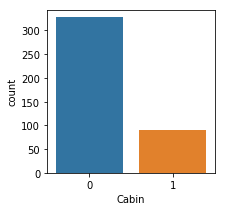

In [718]:
plt.figure(figsize = (3,3))
sns.countplot(x = "Cabin", data = test)
plt.show()

In [719]:
test["Cabin"] = np.where(test["Cabin"].isna(),0,1)

In [720]:
test["Cabin"].value_counts()

1    418
Name: Cabin, dtype: int64

In [721]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [722]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Family_Count    0
dtype: int64

In [723]:
from sklearn.preprocessing import LabelEncoder

input = LabelEncoder()

test["Sex"] = input.fit_transform(test["Sex"])
test["Embarked"] = input.fit_transform(test["Embarked"])

In [724]:
# For final result fetching PassengerId

Passenger_Id = test["PassengerId"]
Passenger_Id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [725]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Count
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,1.0,1.401914,1.839713
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.0,0.854496,1.519072
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.0,1.000000,1.000000
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,1.0,2.000000,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.0,2.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.0,2.000000,11.000000


In [726]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Count'],
      dtype='object')

In [727]:
test_data = test[["Pclass","Sex","Age","Fare","Cabin","Embarked","Family_Count"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAF3958080>,
      dtype=object)

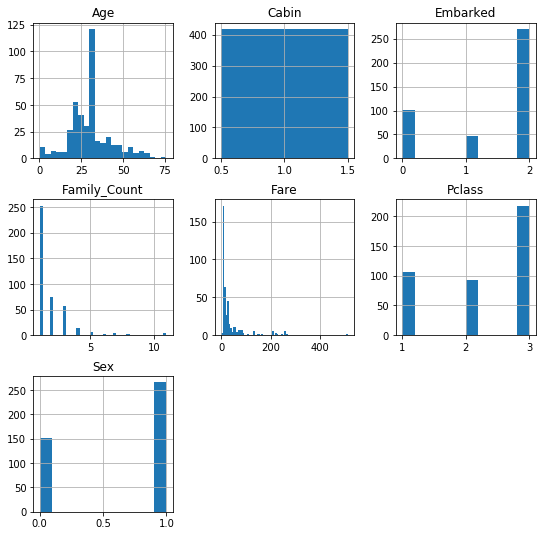

In [728]:
test_data.hist(bins = "auto", figsize = (9,9))

In [729]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass          418 non-null int64
Sex             418 non-null int64
Age             418 non-null float64
Fare            418 non-null float64
Cabin           418 non-null int32
Embarked        418 non-null int64
Family_Count    418 non-null int64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


In [730]:
from sklearn.preprocessing import StandardScaler

SC= StandardScaler()
SC_test_data = SC.fit_transform(test_data)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [731]:
SC_test_data

array([[ 0.87348191,  0.75592895,  0.3349926 , ...,  0.        ,
        -0.47091535, -0.5534426 ],
       [ 0.87348191, -1.32287566,  1.32553003, ...,  0.        ,
         0.70076689,  0.10564289],
       [-0.31581919,  0.75592895,  2.51417495, ...,  0.        ,
        -0.47091535, -0.5534426 ],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, ...,  0.        ,
         0.70076689, -0.5534426 ],
       [ 0.87348191,  0.75592895,  0.        , ...,  0.        ,
         0.70076689, -0.5534426 ],
       [ 0.87348191,  0.75592895,  0.        , ...,  0.        ,
        -1.64259759,  0.76472838]])

In [601]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5)

In [602]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [636]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = LogisticRegression()
model.fit(X_train,Y_train)
Train_Score_Logistic = model.score(X_train,Y_train)
Test_Score_Logistic = model.score(X_test,Y_test)
print("Logistic Regression Train Score: ", Train_Score_Logistic)
print("Logistic Regression Test Score: ", Test_Score_Logistic)
predicted_Y_Logistic = model.predict(X_test)
Accuracy_Score_Logistic = accuracy_score(Y_test,predicted_Y_Logistic)
Confusion_Matrix_Logistic = confusion_matrix(Y_test,predicted_Y_Logistic)
MSE_Logistic = mean_squared_error(Y_test,predicted_Y_Logistic)
print("Logistic Regression Accuracy Score: ", Accuracy_Score_Logistic)
print("Logistic Regression Confusion Matrix: \n",  Confusion_Matrix_Logistic)
print("Logistic Regression Mean Squared Error: ", MSE_Logistic)

Logistic Regression Train Score:  0.8025682182985554
Logistic Regression Test Score:  0.8208955223880597
Logistic Regression Accuracy Score:  0.8208955223880597
Logistic Regression Confusion Matrix: 
 [[147  20]
 [ 28  73]]
Logistic Regression Mean Squared Error:  0.1791044776119403


C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [642]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = DecisionTreeClassifier(criterion="gini",random_state = 12)
params = {'max_features': ['auto', 'sqrt', 'log2'],'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],'random_state':[123]}
model_1 = GridSearchCV(estimator = model, param_grid=params, n_jobs=-1)
model_1.fit(X_train,Y_train)
Train_Score_DecionTree = model_1.score(X_train,Y_train)
Test_Score_DecionTree = model_1.score(X_test,Y_test)
print("Decion Tree Train Score: ", Train_Score_DecionTree)
print("Decion Tree Test Score: ", Test_Score_DecionTree)
predicted_Y_Decision = model_1.predict(X_test)
Accuracy_Score_Decision = accuracy_score(Y_test,predicted_Y_Decision)
Confusion_Matrix_Decision = confusion_matrix(Y_test,predicted_Y_Decision)
MSE_Decision = mean_squared_error(Y_test,predicted_Y_Decision)
print("Decision Tree Accuracy Score: ", Accuracy_Score_Decision)
print("Decision Tree Confusion Matrix: \n",  Confusion_Matrix_Decision)
print("Decision Tree Mean Squared Error: ", MSE_Decision)

C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Decion Tree Train Score:  0.8298555377207063
Decion Tree Test Score:  0.8246268656716418
Decision Tree Accuracy Score:  0.8246268656716418
Decision Tree Confusion Matrix: 
 [[153  14]
 [ 33  68]]
Decision Tree Mean Squared Error:  0.17537313432835822


C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [641]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = RandomForestClassifier(criterion="entropy",random_state = 12)
model.fit(X_train,Y_train)
Train_Score_Random_Forest = model.score(X_train,Y_train)
Test_Score_Random_Forest = model.score(X_test,Y_test)
print("Random Forest Train Score: ", Train_Score_Random_Forest)
print("Random Forest Test Score: ", Test_Score_Random_Forest)
predicted_Y_RandomForest = model.predict(X_test)
Accuracy_Score_RandomForest = accuracy_score(Y_test,predicted_Y_RandomForest)
Confusion_Matrix_RandomForest = confusion_matrix(Y_test,predicted_Y_RandomForest)
MSE_RandomForest = mean_squared_error(Y_test,predicted_Y_RandomForest)
print("Random Forest Accuracy Score: ", Accuracy_Score_RandomForest)
print("Random Forest Confusion Matrix: \n",  Confusion_Matrix_RandomForest)
print("Random Forest Mean Squared Error: ", MSE_RandomForest)

Random Forest Train Score:  0.9759229534510433
Random Forest Test Score:  0.8171641791044776
Random Forest Accuracy Score:  0.8171641791044776
Random Forest Confusion Matrix: 
 [[152  15]
 [ 34  67]]
Random Forest Mean Squared Error:  0.1828358208955224


C:\Users\Agriya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [643]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = SVC()
model.fit(X_train,Y_train)
Train_Score_SVM = model.score(X_train,Y_train)
Test_Score_SVM = model.score(X_test,Y_test)
print("SVM Train Score: ", Train_Score_SVM)
print("SVM Test Score: ", Test_Score_SVM)
predicted_Y_SVM = model.predict(X_test)
Accuracy_Score_SVM = accuracy_score(Y_test,predicted_Y_SVM)
Confusion_Matrix_SVM = confusion_matrix(Y_test,predicted_Y_SVM)
MSE_SVM = mean_squared_error(Y_test,predicted_Y_SVM)
print("SVM Accuracy Score: ", Accuracy_Score_SVM)
print("SVM Confusion Matrix: \n",  Confusion_Matrix_SVM)
print("SVM Mean Squared Error: ", MSE_SVM)

SVM Train Score:  0.8314606741573034
SVM Test Score:  0.835820895522388
SVM Accuracy Score:  0.835820895522388
SVM Confusion Matrix: 
 [[152  15]
 [ 29  72]]
SVM Mean Squared Error:  0.16417910447761194


In [644]:
# Naive Bayes

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = BernoulliNB()
model.fit(X_train,Y_train)
Train_Score_NV = model.score(X_train,Y_train)
Test_Score_NV = model.score(X_test,Y_test)
print("Naive Bayes Train Score: ", Train_Score_NV)
print("Naive Bayes Test Score: ", Test_Score_NV)
predicted_Y_NVB = model.predict(X_test)
Accuracy_Score_NVB = accuracy_score(Y_test,predicted_Y_SVM)
Confusion_Matrix_NVB = confusion_matrix(Y_test,predicted_Y_SVM)
MSE_NVB = mean_squared_error(Y_test,predicted_Y_NVB)
print("Naive Bayes Accuracy Score: ", Accuracy_Score_NVB)
print("Naive Bayes Confusion Matrix: \n",  Confusion_Matrix_NVB)
print("Naive Bayes Mean Squared Error: ", MSE_NVB)

Naive Bayes Train Score:  0.7415730337078652
Naive Bayes Test Score:  0.8171641791044776
Naive Bayes Accuracy Score:  0.835820895522388
Naive Bayes Confusion Matrix: 
 [[152  15]
 [ 29  72]]
Naive Bayes Mean Squared Error:  0.1828358208955224


In [645]:
# CatBoost

from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = CatBoostClassifier(iterations = 1,learning_rate = 0.1)
model.fit(X_train,Y_train)
Train_Score_CBC = model.score(X_train,Y_train)
Test_Score_CBC = model.score(X_test,Y_test)
print("CatBoost Train Score: ", Train_Score_CBC)
print("CatBoost Test Score: ", Test_Score_CBC)
predicted_Y_CBC = model.predict(X_test)
Accuracy_Score_CBC = accuracy_score(Y_test,predicted_Y_CBC)
Confusion_Matrix_CBC = confusion_matrix(Y_test,predicted_Y_CBC)
MSE_CBC = mean_squared_error(Y_test,predicted_Y_CBC)
print("Naive Bayes Accuracy Score: ", Accuracy_Score_CBC)
print("Naive Bayes Confusion Matrix: \n",  Confusion_Matrix_CBC)
print("Naive Bayes Mean Squared Error: ", MSE_CBC)

0:	learn: 0.6593011	total: 39ms	remaining: 0us
CatBoost Train Score:  0.8089887640449438
CatBoost Test Score:  0.8171641791044776
Naive Bayes Accuracy Score:  0.8171641791044776
Naive Bayes Confusion Matrix: 
 [[161   6]
 [ 43  58]]
Naive Bayes Mean Squared Error:  0.1828358208955224


In [646]:
# XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = XGBClassifier(objective = "binary:logistic", max_depth= 2, learning_rate = 1.0, n_estimators = 5)
model.fit(X_train,Y_train)
Train_Score_XGB = model.score(X_train,Y_train)
Test_Score_XGB = model.score(X_test,Y_test)
print("XGBoost Train Score: ", Train_Score_XGB)
print("XGBoost Test Score: ", Test_Score_XGB)
predicted_Y_XGB = model.predict(X_test)
Accuracy_Score_XGB = accuracy_score(Y_test,predicted_Y_XGB)
Confusion_Matrix_XGB = confusion_matrix(Y_test,predicted_Y_XGB)
MSE_XGB = mean_squared_error(Y_test,predicted_Y_XGB)
print("Naive Bayes Accuracy Score: ", Accuracy_Score_XGB)
print("Naive Bayes Confusion Matrix: \n",  Confusion_Matrix_XGB)
print("Naive Bayes Mean Squared Error: ", MSE_XGB)

XGBoost Train Score:  0.8330658105939005
XGBoost Test Score:  0.832089552238806
Naive Bayes Accuracy Score:  0.832089552238806
Naive Bayes Confusion Matrix: 
 [[158   9]
 [ 36  65]]
Naive Bayes Mean Squared Error:  0.16791044776119404


In [656]:
# It seems SVM is the best model for the usecase

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score

model = SVC()
model.fit(X_train,Y_train)
predicted_Y_final = model.predict(SC_test_data)
predicted_Y_final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [736]:
Result = pd.DataFrame({"PassengerId" : Passenger_Id, "Survived" : predicted_Y_final})

In [737]:
Result.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [740]:
Result.to_csv('Result.csv' , index=False)